In [4]:
import pandas as pd
titanic_tree=pd.read_csv("titanic-passengers.csv",sep=";")

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [5]:
titanic_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [6]:
titanic_tree['Age']=titanic_tree.fillna(titanic_tree.mean())
titanic_tree['Sex']=titanic_tree['Sex'].map( {'male': 0, 'female': 1 }).astype(int)
titanic_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(6)
memory usage: 80.2+ KB


In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
features=['Sex','Age','SibSp','Parch']
x=titanic_tree[features]
y=titanic_tree['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [10]:
from sklearn import tree
new_tree = tree.DecisionTreeClassifier(max_depth=10,random_state = 5)
new_tree.fit(x_train, y_train)
Y_pred = new_tree.predict(x_test)
print(metrics.accuracy_score(y_test, Y_pred))

0.7089552238805971


[Text(197.53824626865674, 207.55636363636364, 'X[0] <= 0.5\ngini = 0.473\nsamples = 623\nvalue = [384, 239]'),
 Text(101.81417910447762, 187.7890909090909, 'X[3] <= 0.5\ngini = 0.304\nsamples = 407\nvalue = [331, 76]'),
 Text(46.222388059701494, 168.0218181818182, 'X[1] <= 285.0\ngini = 0.281\nsamples = 343\nvalue = [285, 58]'),
 Text(29.982089552238808, 148.25454545454545, 'X[1] <= 226.5\ngini = 0.217\nsamples = 97\nvalue = [85, 12]'),
 Text(24.985074626865675, 128.48727272727274, 'X[1] <= 224.5\ngini = 0.252\nsamples = 81\nvalue = [69, 12]'),
 Text(19.98805970149254, 108.72, 'X[1] <= 25.5\ngini = 0.237\nsamples = 80\nvalue = [69, 11]'),
 Text(9.99402985074627, 88.95272727272729, 'X[1] <= 15.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(4.997014925373135, 69.18545454545455, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(14.991044776119404, 69.18545454545455, 'X[1] <= 19.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(9.99402985074627, 49.418181818181836, 'gini = 0.0\n

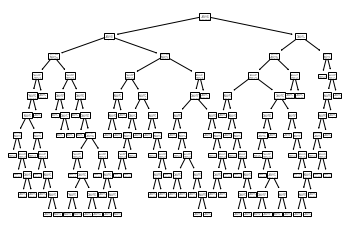

In [15]:
from sklearn.tree import plot_tree

plot_tree(new_tree,max_depth=10)

In [1]:
!pip install graphviz

In [11]:
import graphviz
dot_data=tree.export_graphviz(new_tree,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpdf', '-O', 'data'], make sure the Graphviz executables are on your systems' PATH

In [22]:
from sklearn import tree
new_tree = tree.DecisionTreeClassifier(max_depth=100,random_state = 5)
new_tree.fit(x_train, y_train)
Y_pred = new_tree.predict(x_test)
print(metrics.accuracy_score(y_test, Y_pred))

0.6343283582089553


In [35]:
from sklearn.ensemble import RandomForestClassifier
Ran_tree = RandomForestClassifier(n_estimators=300)
Ran_tree.fit(x_train,y_train)
y_predict=Ran_tree.predict(x_test)
metrics.accuracy_score(y_test,y_predict)

0.6716417910447762

The accuracy obtained with the random tree is not far from the accuracy obtained with the decision tree